In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from mlsmote import MLSMOTE

import tensorflow as tf
from tensorflow.keras import backend as K
# from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
FILE_PATH='data/riasec/labeled-data.csv'
EXCEPTION_SCORES=[0, 8, 16, 32]
THRESHOLD=0.2
EPOCHS=100
BATCH_SIZE=128
INPUT_SHAPE=48
OUTPUT_SHAPE=6

In [3]:
df = pd.read_csv(FILE_PATH)
# df = df[~(
#     (df['R_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['I_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['A_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['S_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['E_Score'].isin(EXCEPTION_SCORES)) & 
#     (df['C_Score'].isin(EXCEPTION_SCORES))
# )]

In [4]:
print(df.columns)

Index(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'I1', 'I2', 'I3', 'I4',
       'I5', 'I6', 'I7', 'I8', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'E1', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'R_Score', 'I_Score', 'A_Score', 'S_Score', 'E_Score', 'C_Score',
       'R_Prob', 'I_Prob', 'A_Prob', 'S_Prob', 'E_Prob', 'C_Prob'],
      dtype='object')


In [5]:
feature_columns = [f'{col}{i}' for col in 'RIASEC' for i in range(1, 9)]
x = df[feature_columns]

label_columns = ['R_Prob','I_Prob','A_Prob','S_Prob','E_Prob','C_Prob']
y = (df[label_columns] >= THRESHOLD).astype(int)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Data training shape\t: {x_train.shape[:]}")
print(f"Data testing shape\t: {x_test.shape[:]}")
print(f"Label training shape\t: {y_train.shape[:]}")
print(f"Label testing shape\t: {y_test.shape[:]}")

print(f"\nData training sample\t:\n,{x_train.head()}")
print(f"\nLabel training sample\t:\n,{y_train.head()}")

Data training shape	: (108611, 48)
Data testing shape	: (27153, 48)
Label training shape	: (108611, 6)
Label testing shape	: (27153, 6)

Data training sample	:
,        R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  E7  E8  C1  C2  C3  C4  \
22808    0   0   0   2   0   0   0   0   3   3  ...   0   3   0   0   0   1   
83359    2   3   3   2   1   3   2   2   3   4  ...   2   4   2   4   3   1   
68299    0   0   0   0   0   0   0   0   0   1  ...   0   4   0   0   0   0   
110292   2   1   0   1   0   0   1   2   4   4  ...   2   3   3   4   1   2   
89050    0   0   0   0   0   1   0   0   3   0  ...   2   1   0   0   1   1   

        C5  C6  C7  C8  
22808    0   0   0   0  
83359    3   3   2   2  
68299    0   2   0   0  
110292   1   4   1   2  
89050    1   1   1   0  

[5 rows x 48 columns]

Label training sample	:
,        R_Prob  I_Prob  A_Prob  S_Prob  E_Prob  C_Prob
22808        0       1       1       1       0       0
83359        0       0       0       0       0       0


In [7]:
# x_resampled, y_resampled = MLSMOTE(x_train, y_train, 100)

# print(f"Data training shape\t: {x_resampled.shape[:]}")
# print(f"Label training shape\t: {y_resampled.shape[:]}")

In [ ]:
def f1_score(y_true, y_pred):
    y_pred_classes = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred_classes, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred_classes, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred_classes), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return K.mean(f1)

In [106]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(INPUT_SHAPE,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), name='dense_layer_1'),
    tf.keras.layers.Dropout(0.5, name='dropout_layer_1'),
    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001), name='dense_layer_2'),
    tf.keras.layers.Dropout(0.3, name='dropout_layer_2'),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation='sigmoid', name='output_layer')
])

In [107]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 64)                3136      
                                                                 
 dropout_layer_1 (Dropout)   (None, 64)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 32)                2080      
                                                                 
 dropout_layer_2 (Dropout)   (None, 32)                0         
                                                                 
 output_layer (Dense)        (None, 6)                 198       
                                                                 
Total params: 5414 (21.15 KB)
Trainable params: 5414 (21.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=[f1_score])

In [ ]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
849/849 [==============================] - 3s 3ms/step - loss: 0.7356 - f1_score: 0.4136 - val_loss: 0.5124 - val_f1_score: 0.5022
Epoch 2/100
849/849 [==============================] - 2s 3ms/step - loss: 0.5306 - f1_score: 0.5315 - val_loss: 0.3899 - val_f1_score: 0.6372
Epoch 3/100
849/849 [==============================] - 2s 3ms/step - loss: 0.4513 - f1_score: 0.6043 - val_loss: 0.3269 - val_f1_score: 0.6929
Epoch 4/100
849/849 [==============================] - 2s 3ms/step - loss: 0.4036 - f1_score: 0.6499 - val_loss: 0.2858 - val_f1_score: 0.7292
Epoch 5/100
849/849 [==============================] - 3s 4ms/step - loss: 0.3677 - f1_score: 0.6824 - val_loss: 0.2543 - val_f1_score: 0.7627
Epoch 6/100
849/849 [==============================] - 3s 4ms/step - loss: 0.3399 - f1_score: 0.7141 - val_loss: 0.2304 - val_f1_score: 0.7998
Epoch 7/100
849/849 [==============================] - 3s 4ms/step - loss: 0.3183 - f1_score: 0.7348 - val_loss: 0.2090 - val_f1_score: 0.8373

In [110]:
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]}, F1 Score: {results[1]}")

849/849 [==============================] - 1s 1ms/step - loss: 0.0397 - f1_score: 0.9842
Loss: 0.03973080962896347, F1 Score: 0.9842095375061035


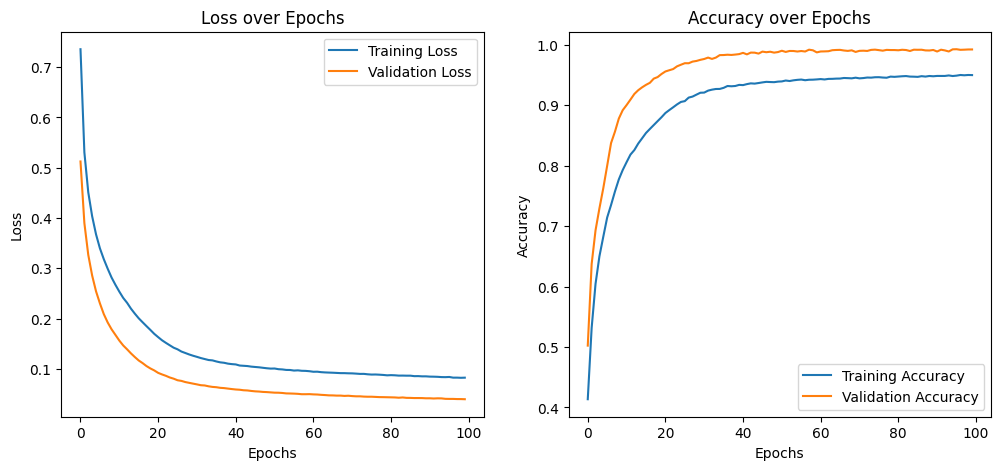

In [111]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Training Accuracy')
plt.plot(history.history['val_f1_score'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [115]:
categories = ['R', 'I', 'A', 'S', 'E', 'C']
new_data = np.array([[5,1,1,1,1,1,1,1,5,3,5,5,5,3,4,5,1,1,4,1,2,1,1,1,4,5,2,1,2,1,1,1,1,1,4,5,4,1,2,3,1,4,4,4,5,5,2,4],
                    [3,2,3,4,4,3,4,1,4,5,1,1,3,3,4,3,5,3,2,3,3,3,4,1,2,3,3,1,4,5,2,1,1,3,1,3,1,2,1,3,2,1,4,2,3,3,2,3],
                    [1,4,2,2,1,3,4,3,3,1,2,5,1,2,2,5,1,5,3,3,1,3,3,4,2,5,5,5,3,3,3,1,5,1,5,3,1,1,4,2,3,3,1,3,4,1,4,2],
                    [1,2,2,2,1,3,4,1,1,1,2,5,1,2,2,5,1,1,3,2,1,3,3,2,2,5,5,2,3,3,3,1,5,1,5,3,1,3,4,2,5,4,4,3,5,1,3,2],
                    [2,3,4,5,2,1,1,5,2,3,2,2,3,3,3,1,3,1,1,2,1,5,3,4,5,1,1,5,4,1,1,5,3,3,2,2,4,5,5,2,3,2,2,4,3,3,5,2],
                    [1,2,3,2,1,4,4,1,5,5,3,5,5,2,3,3,1,1,2,2,1,5,2,2,5,4,5,2,3,3,3,2,2,1,3,2,1,3,4,3,1,4,4,1,3,1,2,1],
                    [1,3,1,2,1,2,1,3,2,3,1,1,2,1,2,2,3,1,2,3,2,1,1,2,5,5,5,1,4,4,5,3,1,1,1,5,3,3,5,1,5,4,4,3,5,5,5,5],
                    [2,2,1,2,3,3,2,2,1,3,4,2,2,2,3,2,5,2,1,3,2,5,5,5,1,4,4,5,4,2,5,4,1,1,4,4,2,4,4,3,1,1,1,3,1,2,5,2],
                    [1,4,3,5,4,5,1,1,1,1,5,5,5,5,1,5,5,5,3,5,5,3,1,5,1,3,3,5,2,5,3,5,2,3,1,1,2,3,2,1,2,1,5,4,5,1,3,2],
                    [5,1,2,2,3,2,1,1,3,2,1,1,1,1,5,3,1,3,1,3,2,4,1,5,1,2,5,5,3,4,5,5,1,3,3,4,5,5,1,2,4,2,3,2,5,1,5,3]])

predictions = model.predict(new_data)
binary_predictions = (predictions >= THRESHOLD).astype(int)

print("Probabilitas Prediksi:\n", predictions)
print("\nHasil Biner:\n", binary_predictions)

print("\nKeterangan Kategori RIASEC:")
for i, binary_result in enumerate(binary_predictions):
    predicted_categories = [categories[j] for j, val in enumerate(binary_result) if val == 1]
    print(f"Data ke-{i+1}: {', '.join(predicted_categories) if predicted_categories else 'Tidak ada kategori'}")

print("\nGround Truth: IC, RIA, S, EC, E, IS, SC, AS, A, S")

1/1 [==============================] - 0s 23ms/step
Probabilitas Prediksi:
 [[9.84744262e-03 1.00000000e+00 1.41587980e-05 6.01130880e-14
  6.67249515e-06 9.99692321e-01]
 [1.27881235e-02 1.92648303e-02 2.01510526e-02 1.76157720e-08
  7.95519358e-13 1.98940840e-03]
 [5.02966670e-03 1.18287826e-05 4.63490048e-03 9.42795038e-01
  1.18800017e-06 1.41811953e-03]
 [1.64572876e-02 3.65453866e-06 1.98278707e-04 3.47957294e-03
  1.27364499e-02 9.95622456e-01]
 [1.36789745e-02 3.99112508e-07 8.60827684e-04 1.35920018e-07
  1.57409720e-02 1.07185654e-02]
 [2.82667577e-03 1.00000000e+00 1.59272196e-04 9.96408522e-01
  7.75472930e-09 2.01719755e-04]
 [1.51140057e-03 1.36430200e-10 1.08674303e-05 9.99998271e-01
  9.58941087e-07 9.99999940e-01]
 [3.45222373e-03 7.75316266e-07 9.99927580e-01 9.99680877e-01
  2.51177098e-05 1.72059415e-04]
 [1.26030352e-02 1.18756769e-02 9.99993563e-01 8.49828120e-06
  1.81934984e-17 8.47640797e-04]
 [3.05604073e-03 2.13936122e-08 9.38244280e-04 9.99959111e-01
  2.902